In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
!pip install scikit-learn-extra


In [ ]:
!pip install scikit-learn-extra yellowbrick seaborn

In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

In [ ]:
file_path = '/content/Customers-cluster (1).csv'  # Update this path if necessary
df = pd.read_csv(file_path)


In [ ]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


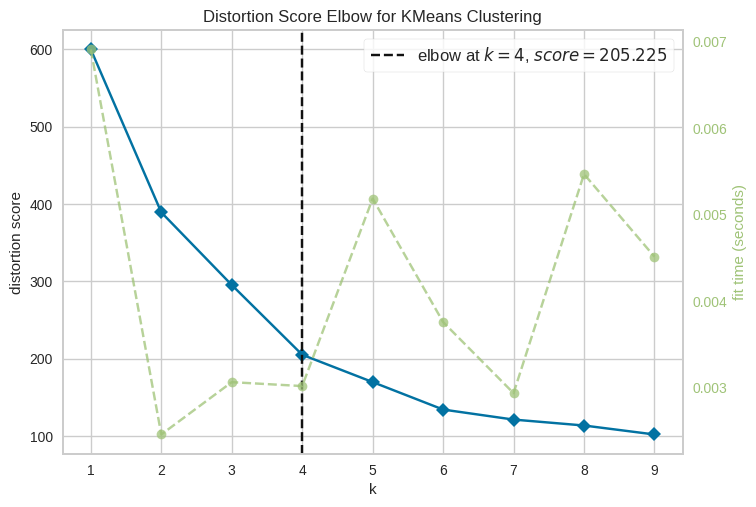

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans, k=(1, 10))
elbow_visualizer.fit(X_scaled)
elbow_visualizer.show()


In [ ]:
optimal_clusters = elbow_visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
kmedoids = KMedoids(n_clusters=optimal_clusters, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

In [ ]:
df['KMeans_Cluster'] = kmeans_labels
df['KMedoids_Cluster'] = kmedoids_labels

Text(0, 0.5, 'Spending Score')

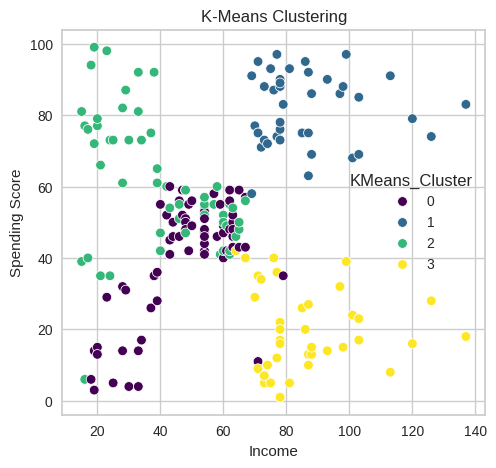

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Income")
plt.ylabel("Spending Score")


Text(0, 0.5, 'Spending Score')

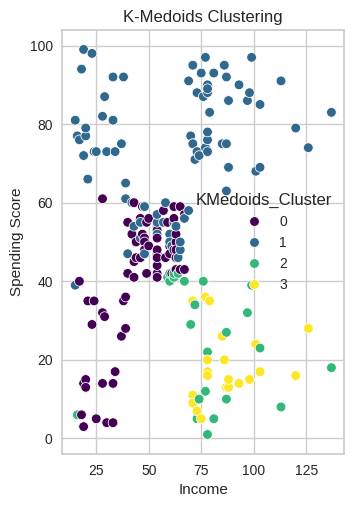

In [ ]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMedoids_Cluster', palette='viridis')
plt.title("K-Medoids Clustering")
plt.xlabel("Income")
plt.ylabel("Spending Score")


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>